In [1]:
from metabolinks import align, read_aligned_spectra, read_spectra_from_xcel
from metabolinks.similarity import mz_similarity

#### Read (reload) aligned from CSV

In [2]:
aligned_all_pos = read_aligned_spectra('aligned_1ppm_min3_1ppm_positive.csv', labels=True, sep=',')
aligned_all_neg = read_aligned_spectra('aligned_1ppm_min3_1ppm_negative.csv', labels=True, sep=',')

## Lists of m/z exclusive of each label

In [3]:
print('------- POSITIVE mode ------------------')
for label, values in aligned_all_pos.exclusive_mz.items():
    print(f'{label:4} {len(values)}')

with open('exclusive_pos.txt','w') as ofile:
    for label, values in aligned_all_pos.exclusive_mz.items():
        line = '\t'.join([label] + [str(v) for v in values])
        print(line, file = ofile)

print('------- NEGATIVE mode ------------------')
for label, values in aligned_all_neg.exclusive_mz.items():
    print(f'{label:4} {len(values)}')

with open('exclusive_neg.txt','w') as ofile:
    for label, values in aligned_all_neg.exclusive_mz.items():
        line = '\t'.join([label] + [str(v) for v in values])
        print(line, file = ofile)

------- POSITIVE mode ------------------
CAN  16
CS   33
LAB  41
PN   412
REG  234
RIP  4
RL   30
ROT  15
RU   140
TRI  101
CFN  39
CHT  8
SB   21
------- NEGATIVE mode ------------------
CAN  28
CS   103
LAB  47
PN   111
REG  230
RIP  143
RL   17
ROT  199
RU   284
TRI  21
CFN  6
CHT  42
SB   22


In [4]:
aligned_all_pos = read_aligned_spectra('aligned_1ppm_min3_2ppm_positive.csv', labels=True, sep=',')
aligned_all_neg = read_aligned_spectra('aligned_1ppm_min3_2ppm_negative.csv', labels=True, sep=',')
#print('------ positive mode aligned --------------')
#print(aligned_all_pos.info())
#print('------ negative mode aligned --------------')
#print(aligned_all_neg.info())

In [5]:
print('------- POSITIVE mode ------------------')
for label, values in aligned_all_pos.exclusive_mz.items():
    print(f'{label:4} {len(values)}')

with open('exclusive_pos_2ppm.txt','w') as ofile:
    for label, values in aligned_all_pos.exclusive_mz.items():
        line = '\t'.join([label] + [str(v) for v in values])
        print(line, file = ofile)

print('------- NEGATIVE mode ------------------')
for label, values in aligned_all_neg.exclusive_mz.items():
    print(f'{label:4} {len(values)}')

with open('exclusive_neg_2ppm.txt','w') as ofile:
    for label, values in aligned_all_neg.exclusive_mz.items():
        line = '\t'.join([label] + [str(v) for v in values])
        print(line, file = ofile)

------- POSITIVE mode ------------------
CAN  13
CS   22
LAB  37
PN   364
REG  209
RIP  2
RL   19
ROT  9
RU   115
TRI  83
CFN  35
CHT  8
SB   15
------- NEGATIVE mode ------------------
CAN  25
CS   139
LAB  15
PN   60
REG  216
RIP  63
RL   11
ROT  170
RU   202
TRI  18
CFN  7
CHT  34
SB   14


## Similarity analysis

#### Read aligned data, using peaks that appear in at least 2 samples

In [6]:
aligned_all_pos = read_aligned_spectra('aligned_1ppm_min2_1ppm_positive.csv', labels=True, sep=',')
aligned_all_neg = read_aligned_spectra('aligned_1ppm_min2_1ppm_negative.csv', labels=True, sep=',')
#print('------ positive mode aligned --------------')
#print(aligned_all_pos.info())
#print('------ negative mode aligned --------------')
#print(aligned_all_neg.info())

#### Compute m/z similarities

In [7]:
sim_pos = mz_similarity(aligned_all_pos)
sim_neg = mz_similarity(aligned_all_neg)

In [8]:
print(sim_pos)


Sample similarity, counts of common peaks
          14   15   16   29   30   31    8    9   10    23   ...       34  \
14       330  277  253  202  200  195  207  214  207   152   ...      175   
15       277  379  302  233  232  224  227  231  223   179   ...      201   
16       253  302  355  222  222  218  212  212  208   164   ...      189   
29       202  233  222  667  514  526  230  233  235   308   ...      351   
30       200  232  222  514  612  471  236  236  235   284   ...      326   
31       195  224  218  526  471  624  232  237  239   294   ...      338   
8        207  227  212  230  236  232  489  399  369   182   ...      205   
9        214  231  212  233  236  237  399  501  381   184   ...      218   
10       207  223  208  235  235  239  369  381  471   181   ...      221   
23       152  179  164  308  284  294  182  184  181  1487   ...      431   
24       151  176  162  308  286  297  187  190  188  1246   ...      443   
25       146  174  159  296  269 

In [9]:
print(sim_neg)


Sample similarity, counts of common peaks
          14   15   16   29   30   31    8    9   10   23   ...      34  \
14       442  286  345  186  183  170  168  179  179   34   ...     151   
15       286  319  222  121  118  108  144  157  155   25   ...     146   
16       345  222  378  174  171  159  168  181  177   34   ...     148   
29       186  121  174  674  637  588  143  151  150   88   ...     202   
30       183  118  171  637  677  591  142  150  149   88   ...     214   
31       170  108  159  588  591  628  128  135  135   87   ...     184   
8        168  144  168  143  142  128  370  331  339  118   ...     131   
9        179  157  181  151  150  135  331  402  371  111   ...     138   
10       179  155  177  150  149  135  339  371  410  120   ...     138   
23        34   25   34   88   88   87  118  111  120  350   ...      23   
24        46   33   45   95   95   94  127  121  129  314   ...      30   
25        46   33   45   97   97   96  128  121  129  326

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd

In [11]:
dfpos = pd.DataFrame(sim_pos.sample_similarity_jaccard,
                     columns=sim_pos.sample_names,
                     index=sim_pos.sample_names)

dfneg = pd.DataFrame(sim_neg.sample_similarity_jaccard,
                     columns=sim_neg.sample_names,
                     index=sim_neg.sample_names)

Sample similarity, positive mode


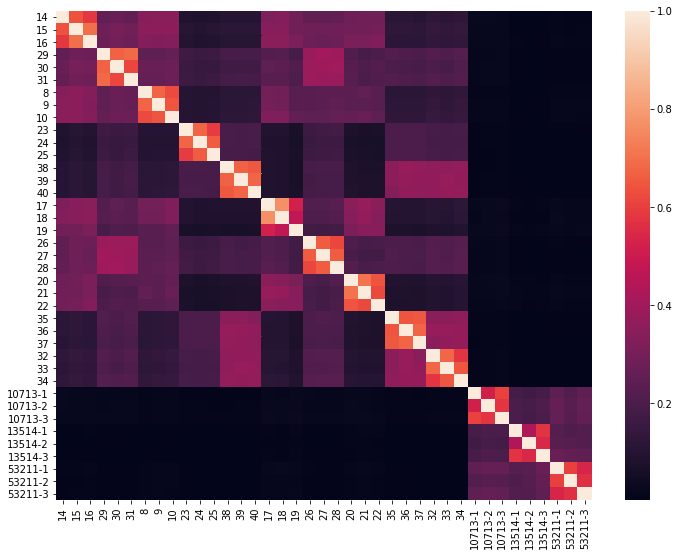

In [12]:
f, ax = plt.subplots(figsize=(12, 9))

print('Sample similarity, positive mode')
hm = sns.heatmap(dfpos, annot=False, ax=ax)

Sample similarity, negative mode


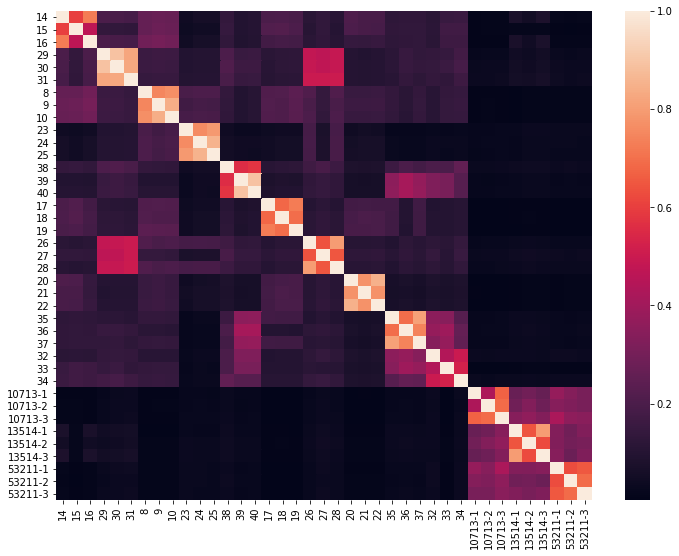

In [13]:
f, ax = plt.subplots(figsize=(12, 9))

print('Sample similarity, negative mode')
hm = sns.heatmap(dfneg, annot=False, ax=ax)

In [14]:
dfpos = pd.DataFrame(sim_pos.label_similarity_jaccard,
                     columns=sim_pos.unique_labels,
                     index=sim_pos.unique_labels)

dfneg = pd.DataFrame(sim_neg.label_similarity_jaccard,
                     columns=sim_neg.unique_labels,
                     index=sim_neg.unique_labels)

Label similarity, positive mode


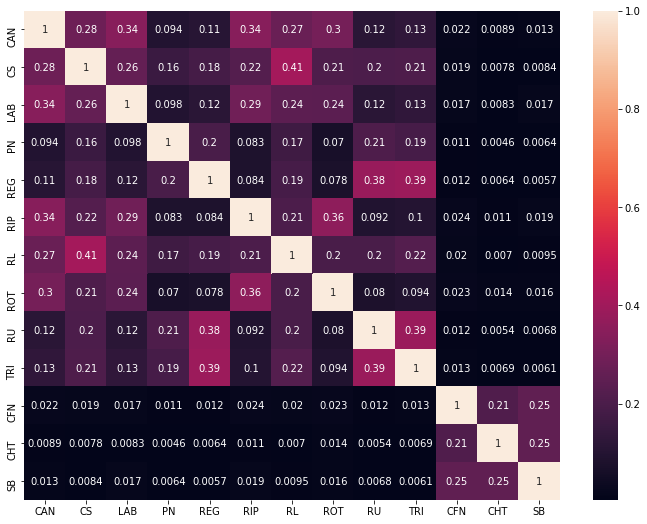

In [15]:
f, ax = plt.subplots(figsize=(12, 9))

print('Label similarity, positive mode')
hm = sns.heatmap(dfpos, annot=True, ax=ax)

Label similarity, negative mode


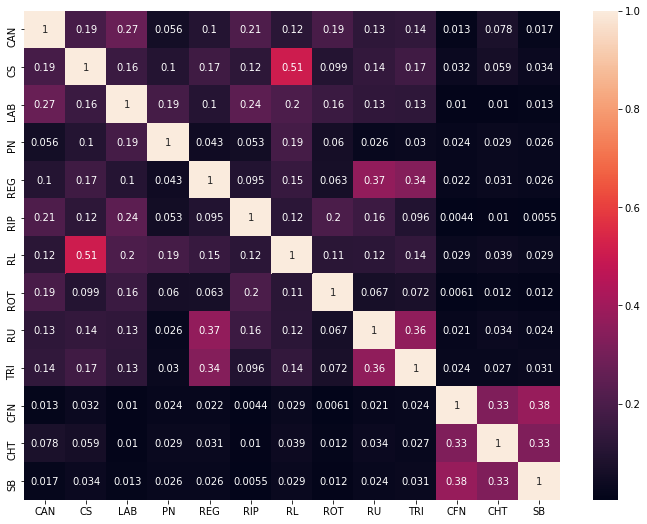

In [16]:
f, ax = plt.subplots(figsize=(12, 9))

print('Label similarity, negative mode')
hm = sns.heatmap(dfneg, annot=True, ax=ax)

#### Doing... Experiments with scipy functions...

In [17]:
import scipy.spatial.distance as dist
import scipy.cluster.hierarchy as hier

In [18]:
def df_to_bool(df):
    df = df.copy()
    df[df.notnull()] = 1
    df[df.isna()] = 0
    return df
aligned_01 = df_to_bool(aligned_all_neg.data)
# confirm it is 0's and 1's
#aligned_01

In [19]:
jdist = dist.pdist(aligned_01.T, metric='jaccard')
print(dist.squareform(jdist))
print('------------------------------------')
sim = mz_similarity(aligned_all_neg)
jsim = sim.sample_similarity_jaccard
jdist = 1 - jsim
print(jdist)

[[0.         0.39789474 0.27368421 ... 0.98458904 0.98819562 0.98148148]
 [0.39789474 0.         0.53263158 ... 0.98924731 0.99367089 0.98951782]
 [0.27368421 0.53263158 0.         ... 0.98852772 0.98867925 0.98499062]
 ...
 [0.98458904 0.98924731 0.98852772 ... 0.         0.37368421 0.34736842]
 [0.98819562 0.99367089 0.98867925 ... 0.37368421 0.         0.31052632]
 [0.98148148 0.98951782 0.98499062 ... 0.34736842 0.31052632 0.        ]]
------------------------------------
[[0.         0.39789474 0.27368421 ... 0.98458904 0.98819562 0.98148148]
 [0.39789474 0.         0.53263158 ... 0.98924731 0.99367089 0.98951782]
 [0.27368421 0.53263158 0.         ... 0.98852772 0.98867925 0.98499062]
 ...
 [0.98458904 0.98924731 0.98852772 ... 0.         0.37368421 0.34736842]
 [0.98819562 0.99367089 0.98867925 ... 0.37368421 0.         0.31052632]
 [0.98148148 0.98951782 0.98499062 ... 0.34736842 0.31052632 0.        ]]


## Wrapping up in a function...

In [20]:
def clustermap_peak_list(aligned):
    aligned_01 = aligned.data.copy()
    aligned_01[aligned_01.notnull()] = 1
    aligned_01[aligned_01.isna()] = 0
    
    ulabels = aligned.unique_labels()
    n = len(ulabels)
    
    p = sns.color_palette() + sns.color_palette("Set1", n_colors=n-10, desat=.5)
    sample_to_labels = pd.Series(aligned.labels, index=aligned.sample_names)
    label_colors = pd.Series(p, index=ulabels)
    sample_colors = sample_to_labels.map(label_colors)
    
    g = sns.clustermap(aligned_01, metric="jaccard", figsize=(15, 20), 
                       row_cluster=False,
                       col_colors=sample_colors,
                       yticklabels=False)
    # fix bug in seaborn, error in clustermap if cbar == False
    ax=g.cax; aax=ax.clear(); aax = ax.axis('off'); 

    # draw legend
    lpatches = [mpatches.Patch(color=c, label=lbl) for (lbl, c) in label_colors.iteritems()]
    leg = plt.legend(handles=lpatches, fontsize=20)
    return g
    

Sample HC, NEGATIVE mode


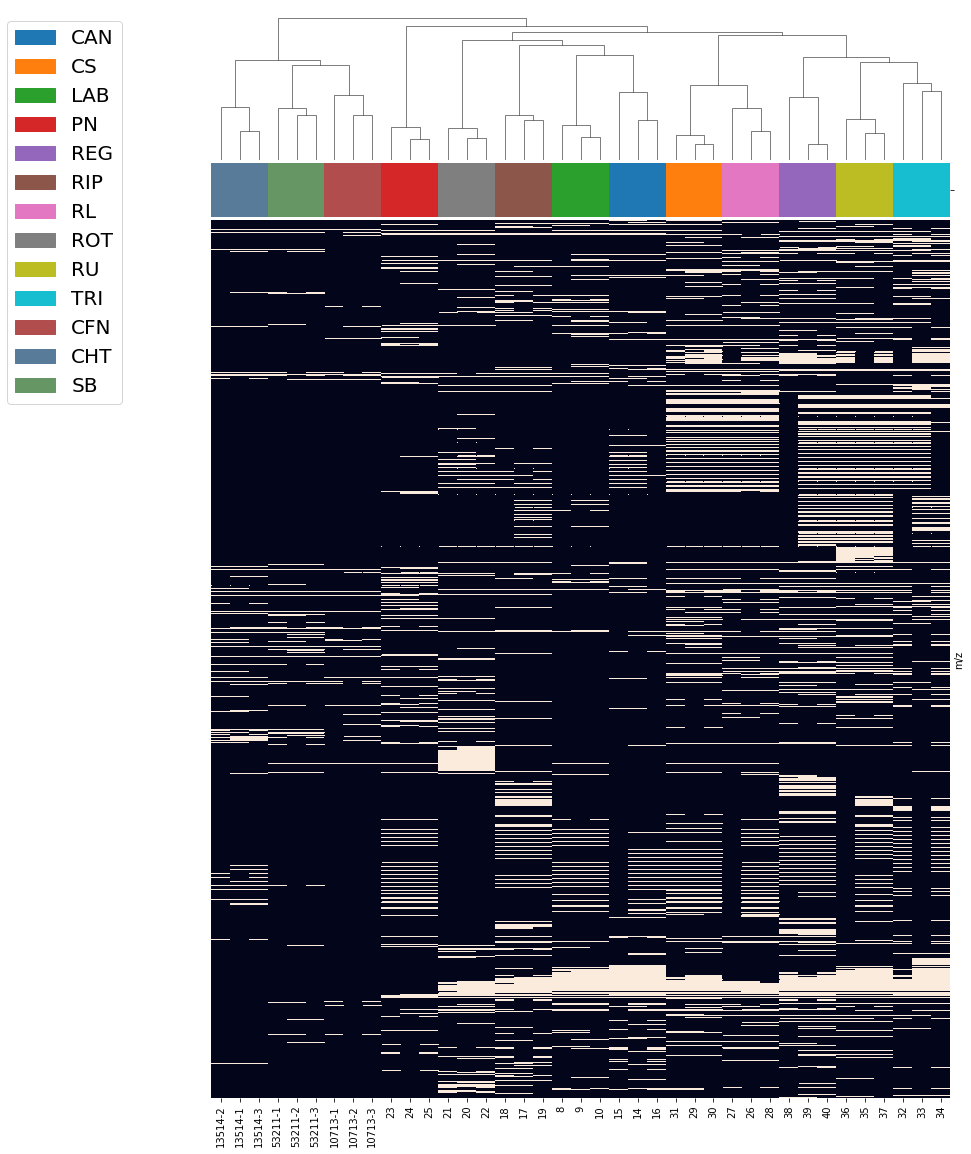

In [23]:
print('Sample HC, NEGATIVE mode')
g = clustermap_peak_list(aligned_all_neg)
g.savefig('sampleHC_negative.pdf')


Sample HC, POSITIVE mode


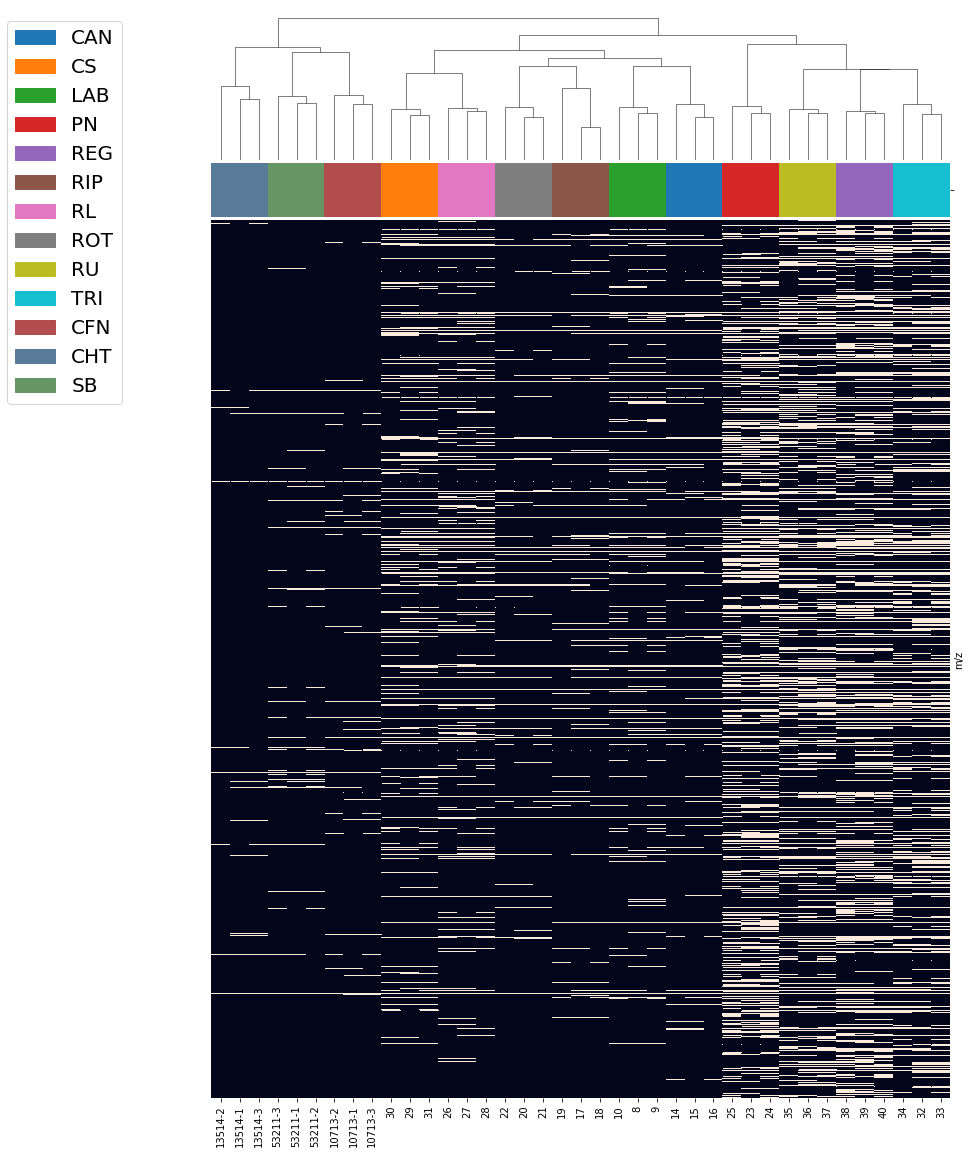

In [24]:
print('Sample HC, POSITIVE mode')
g = clustermap_peak_list(aligned_all_pos)
g.savefig('sampleHC_positive.pdf')

Cultivar dendogram, Jaccard distance, NEGATIVE MODE


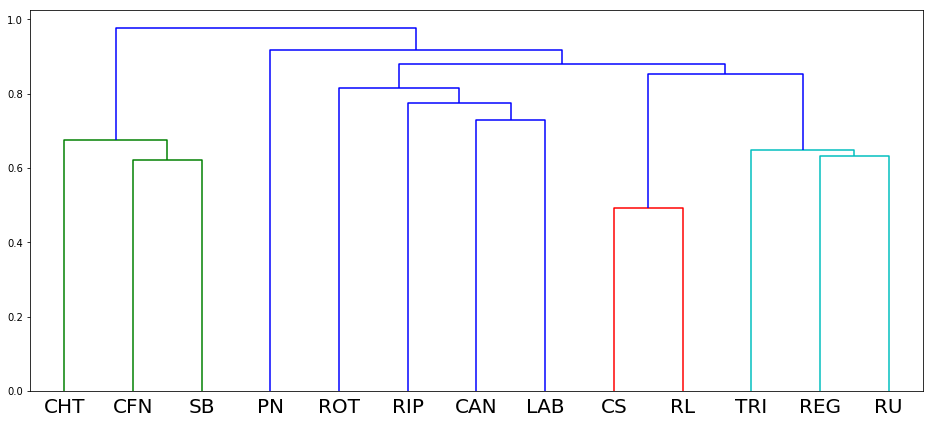

In [32]:
print('Cultivar dendogram, Jaccard distance, NEGATIVE MODE')
jdist = dist.squareform(1 - sim_neg.label_similarity_jaccard)
Z = hier.linkage(jdist, method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z, labels=sim_neg.unique_labels,
                     leaf_font_size=20,
                     above_threshold_color='b')
fig.savefig('dendo_cultivars_jaccard_negative.pdf')

Cultivar dendogram, Jaccard distance, POSITIVE MODE


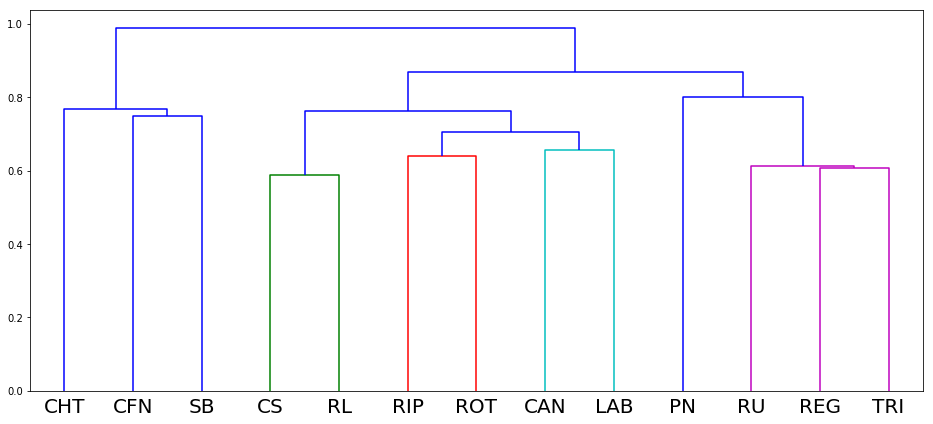

In [33]:
print('Cultivar dendogram, Jaccard distance, POSITIVE MODE')
jdist = dist.squareform(1 - sim_pos.label_similarity_jaccard)
Z = hier.linkage(jdist, method='average')

fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z, labels=sim_pos.unique_labels,
                     leaf_font_size=20,
                     above_threshold_color='b')
fig.savefig('dendo_cultivars_jaccard_positive.pdf')